# Association Rules for Market Basket Analysis

Association rule analysis attempts to find sets of informative patterns from large, sparse data sets. The basic idea of association rule mining is this: when events occur together more often than one would expect from their individual rates of occurrence, such cooccurrence is an interesting pattern. 
<br>
<br>
**Some terms to understand for association rules**
- An *association* is simply the co-occurrence of two or more things.
<br> Hot dogs might be positively associated with relish, hot dog buns, soda, potato chips, and ketchup.
- A *set of items* is a group of one or more items, and might be written as {item1, item2, ...}. 
<br> For instance, a set might be {relish} or {hot dogs, soda, potato chips}.
- A *transaction* is a set of items that co-occur in an observation. In marketing, a common transaction is the *market basket*, the set of things that are purchased or considered for purchase at one time.
- A *rule* expresses the incidence across transactions of one set of items as a condition of another set of items.
<br> The association of relish, conditional on hot dogs, is expressed in the rule {relish} ⇒ {hot dogs}.
<br>
<br>

**Some metrics to understand for association rules**
<br>
- The **support** for a set of items is the proportion of all transactions that contain the set.
<br> If {hot dogs, soda} appears in 10 out of 200 transactions, then support ({hotdogs, soda}) = 0.05.
<br>
<br>
- **Confidence** is the support for the co-occurrence of all items in a rule, conditional on the support for the left hand set alone.
\begin{equation*} confidence(X ⇒ Y ) = \frac {support (X ∩ Y )}{support(X)} \end{equation*}
<br>
If {relish} occurs in 1% of transactions (in other words, support ({relish}) = 0.01) and {relish, hot dogs} appears in 0.5%,
then con f idence({relish} ⇒ {hotdogs}) = 0.005/0.1 = 0.5. In other words, hot dogs appear alongside relish 50% of the time that relish appears.
<br>
<br>
- **Lift** is the support of a set conditional on the joint support of each element.
\begin{equation*}  lift (X ⇒ Y ) = \frac {support (X ∩ Y )}{(support (X) * support (Y ))}\end{equation*}

<br>
To continue the hot dog example, if support ({relish}) = 0.01, support ({hotdogs}) = 0.01, and support ({relish, hotdogs}) = 0.005, then li f t ({relish ⇒ hotdogs}) = 0.005/(0.01 ∗ 0.01) = 50. In other words, the combination {relish, hot dogs} occurs 50 times more often than we would expect if the two items were independent.
<br>
<br>
When we search for rules we wish to exceed aminimum threshold on each: to find item sets that occur relatively frequently
in transactions (support), that showstrong conditional relationships (confidence), and that are more common than chance (lift).


*For instance, if item A and B are bought together more frequently then several steps can be taken to increase the profit. For example:*

- A and B can be placed together so that when a customer buys one of the product he doesn't have to go far away to buy the other product.
- People who buy one of the products can be targeted through an advertisement campaign to buy the other.
- Collective discounts can be offered on these products if the customer buys both of them.
- Both A and B can be packaged together.

**Apriori algorithm**
<br> <br>
Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

**Theory of Apriori Algorithm**
<br>
<br>
For large sets of data, there can be hundreds of items in hundreds of thousands transactions. The Apriori algorithm tries to extract rules for each possible combination of items. For instance, Lift can be calculated for item 1 and item 2, item 1 and item 3, item 1 and item 4 and then item 2 and item 3, item 2 and item 4 and then combinations of items e.g. item 1, item 2 and item 3; similarly item 1, item2, and item 4, and so on.

As you can see from the above example, this process can be extremely slow due to the number of combinations. To speed up the process, we need to perform the following steps:

- Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).
- Extract all the subsets having higher value of support than minimum threshold.
- Select all the rules from the subsets with confidence value higher than minimum threshold.
- Order the rules by descending order of Lift.

Other datasets that can be used for analysis: 
- https://www.kaggle.com/gorkhachatryan01/purchase-behaviour 
- https://www.kaggle.com/irfanasrullah/groceries 
- https://www.kaggle.com/roshansharma/market-basket-optimization 

In [1]:
import pandas as pd
from apyori import apriori

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import numpy as np

In [2]:
store_data = pd.read_csv('data/store_data.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
store_data.shape

(7501, 20)

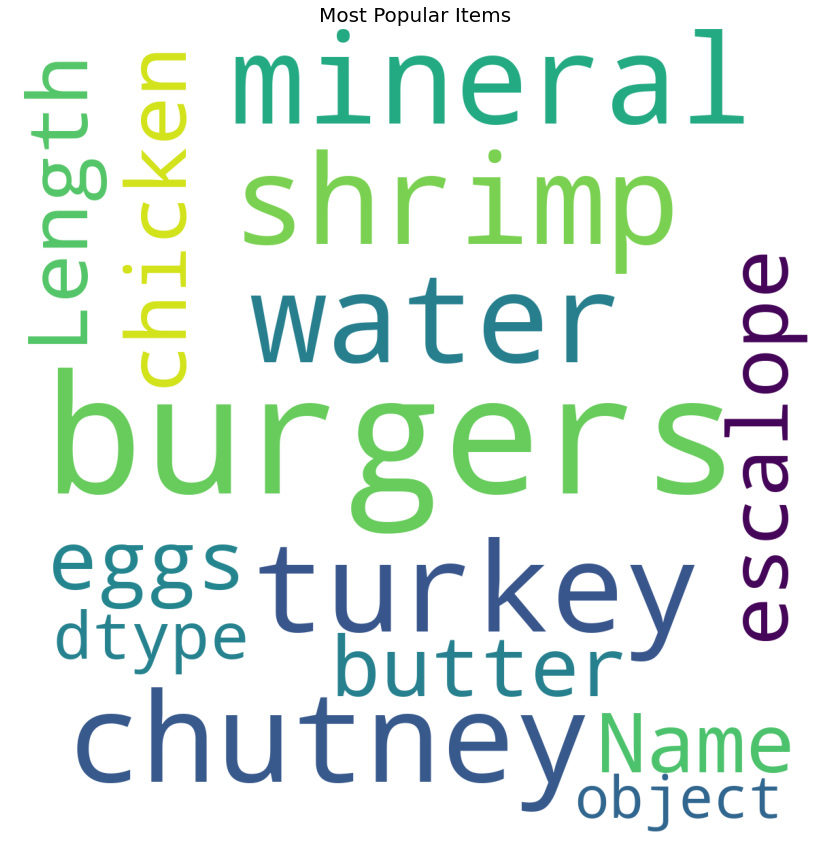

In [4]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(store_data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

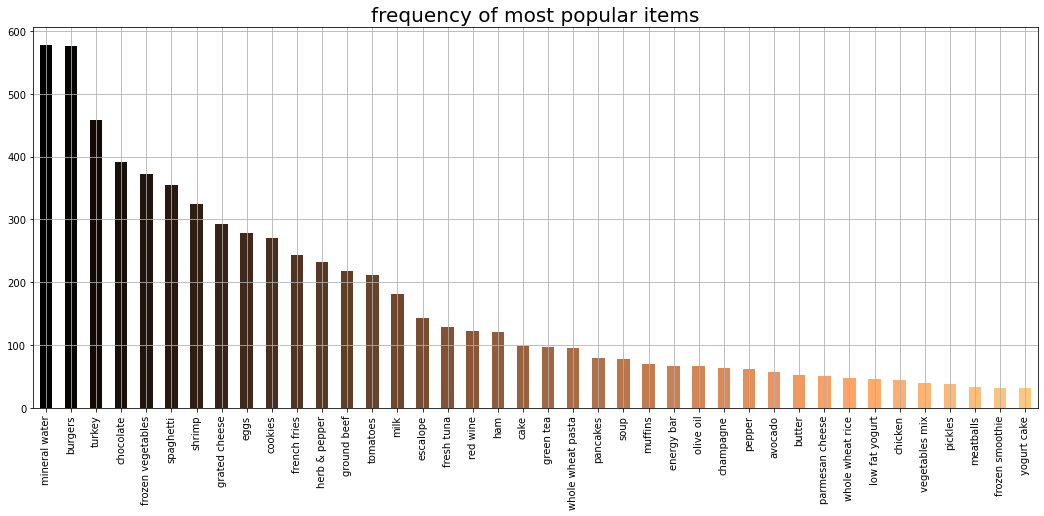

In [5]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
store_data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list.

In [6]:
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])

Let's suppose that we want rules for only those items that are purchased at least 5 times a day, or 7 x 5 = 35 times in one week, since our dataset is for a one-week time period. The support for those items can be calculated as 35/7500 = 0.0045. The minimum confidence for the rules is 20% or 0.2. Similarly, we specify the value for lift as 3 and finally min_length is 2 since we want at least two products in our rules.

In [7]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [8]:
association_results[0]

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

The support value for the first rule is 0.0045. This number is calculated by dividing the number of transactions containing light cream divided by total number of transactions. The confidence level for the rule is 0.2905 which shows that out of all the transactions that contain light cream, 29.05% of the transactions also contain chicken. Finally, the lift of 4.84 tells us that chicken is 4.84 times more likely to be bought by the customers who buy light cream compared to the default likelihood of the sale of chicken.

In [9]:
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: whole wheat pasta -> olive oil
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: light cream -> nan
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: chocolate -> frozen vegetables
Support: 0.005332622317024397
Confide